In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f3ad35afc16c8598911a157a2953b05


In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

  # If an error is experienced, skip the city.
    except:
        
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")      

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isangel
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | svetlaya
Processing Record 6 of Set 1 | oussouye
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | ancud
Proce

Processing Record 38 of Set 4 | amderma
City not found. Skipping...
Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | mantena
Processing Record 41 of Set 4 | mareeba
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | baruun-urt
Processing Record 44 of Set 4 | sangar
Processing Record 45 of Set 4 | maunabo
Processing Record 46 of Set 4 | kailua
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | mpika
Processing Record 49 of Set 4 | westport
Processing Record 50 of Set 4 | batouri
Processing Record 1 of Set 5 | lima
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | thinadhoo
Processing Record 4 of Set 5 | maragogi
Processing Record 5 of Set 5 | mogoytuy
Processing Record 6 of Set 5 | quatre cocos
Processing Record 7 of Set 5 | tungkang
City not found. Skipping...
Processing Record 8 of Set 5 | sur
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | sao miguel do araguaia
Processi

Processing Record 28 of Set 8 | kochevo
Processing Record 29 of Set 8 | araouane
Processing Record 30 of Set 8 | canton
Processing Record 31 of Set 8 | kismayo
Processing Record 32 of Set 8 | inndyr
Processing Record 33 of Set 8 | savonlinna
Processing Record 34 of Set 8 | viligili
City not found. Skipping...
Processing Record 35 of Set 8 | artyk
City not found. Skipping...
Processing Record 36 of Set 8 | severo-kurilsk
Processing Record 37 of Set 8 | spruce grove
Processing Record 38 of Set 8 | hambantota
Processing Record 39 of Set 8 | vostok
Processing Record 40 of Set 8 | evensk
Processing Record 41 of Set 8 | banjar
Processing Record 42 of Set 8 | nanchong
Processing Record 43 of Set 8 | broken hill
Processing Record 44 of Set 8 | rosetown
Processing Record 45 of Set 8 | esso
Processing Record 46 of Set 8 | taree
Processing Record 47 of Set 8 | baykit
Processing Record 48 of Set 8 | fort nelson
Processing Record 49 of Set 8 | severo-yeniseyskiy
Processing Record 50 of Set 8 | kats

Processing Record 17 of Set 12 | chumikan
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | tsiroanomandidy
Processing Record 20 of Set 12 | isla mujeres
Processing Record 21 of Set 12 | pekan
Processing Record 22 of Set 12 | nishihara
Processing Record 23 of Set 12 | assiniboia
Processing Record 24 of Set 12 | roebourne
Processing Record 25 of Set 12 | yulara
Processing Record 26 of Set 12 | xining
Processing Record 27 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 28 of Set 12 | portales
Processing Record 29 of Set 12 | bosaso
Processing Record 30 of Set 12 | makakilo city
Processing Record 31 of Set 12 | yantal
Processing Record 32 of Set 12 | amapa
Processing Record 33 of Set 12 | puerto carreno
Processing Record 34 of Set 12 | lujan
Processing Record 35 of Set 12 | anarrakhi
Processing Record 36 of Set 12 | ilulissat
Processing Record 37 of Set 12 | pishin
Processing Record 38 of Set 12 | jacksonville beach
Processing Record 39 of Se

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isangel,-19.5500,169.2667,77.11,83,75,2.30,VU,2022-04-24 21:37:13
1,Bengkulu,-3.8004,102.2655,75.20,91,100,4.76,ID,2022-04-24 21:38:49
2,Qaanaaq,77.4840,-69.3632,4.51,73,86,5.21,GL,2022-04-24 21:38:50
3,Svetlaya,46.5389,138.3297,42.87,57,0,3.69,RU,2022-04-24 21:38:51
4,Oussouye,12.4850,-16.5469,84.38,55,45,8.12,SN,2022-04-24 21:38:51
5,Albany,42.6001,-73.9662,70.45,39,43,3.00,US,2022-04-24 21:38:51
6,Bluff,-46.6000,168.3333,54.81,81,95,26.89,NZ,2022-04-24 21:38:52
7,Poum,-20.2333,164.0167,76.14,76,91,11.79,NC,2022-04-24 21:35:52
8,Ushuaia,-54.8000,-68.3000,44.26,53,0,8.05,AR,2022-04-24 21:38:52
9,Rikitea,-23.1203,-134.9692,72.54,90,100,14.67,PF,2022-04-24 21:38:53


In [11]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Isangel,VU,2022-04-24 21:37:13,-19.5500,169.2667,77.11,83,75,2.30
1,Bengkulu,ID,2022-04-24 21:38:49,-3.8004,102.2655,75.20,91,100,4.76
2,Qaanaaq,GL,2022-04-24 21:38:50,77.4840,-69.3632,4.51,73,86,5.21
3,Svetlaya,RU,2022-04-24 21:38:51,46.5389,138.3297,42.87,57,0,3.69
4,Oussouye,SN,2022-04-24 21:38:51,12.4850,-16.5469,84.38,55,45,8.12
5,Albany,US,2022-04-24 21:38:51,42.6001,-73.9662,70.45,39,43,3.00
6,Bluff,NZ,2022-04-24 21:38:52,-46.6000,168.3333,54.81,81,95,26.89
7,Poum,NC,2022-04-24 21:35:52,-20.2333,164.0167,76.14,76,91,11.79
8,Ushuaia,AR,2022-04-24 21:38:52,-54.8000,-68.3000,44.26,53,0,8.05
9,Rikitea,PF,2022-04-24 21:38:53,-23.1203,-134.9692,72.54,90,100,14.67


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

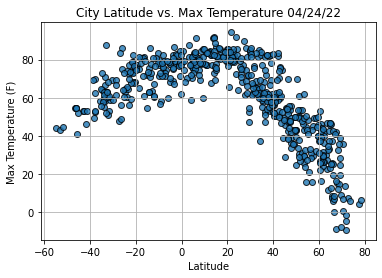

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

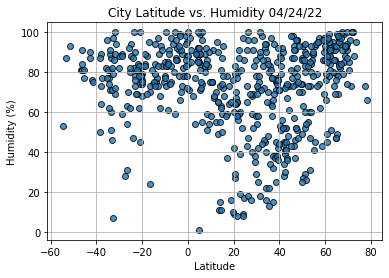

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

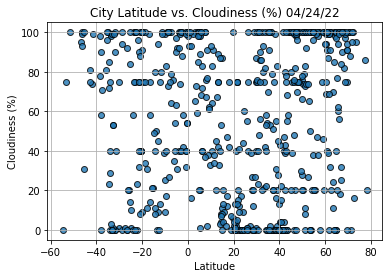

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

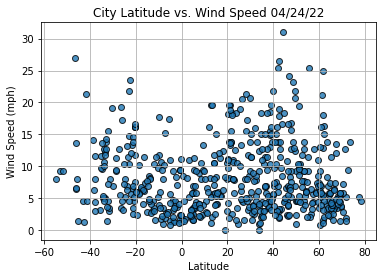

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

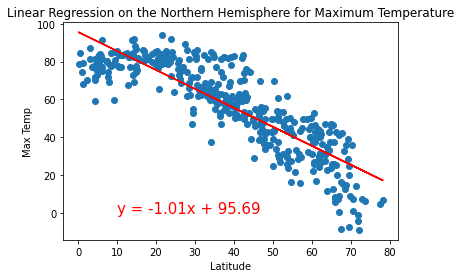

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,0))

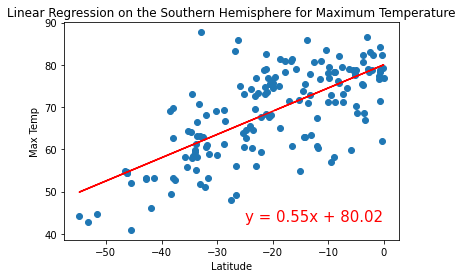

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,43))

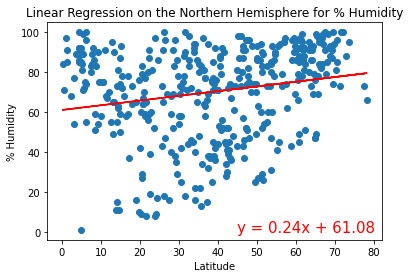

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,0))

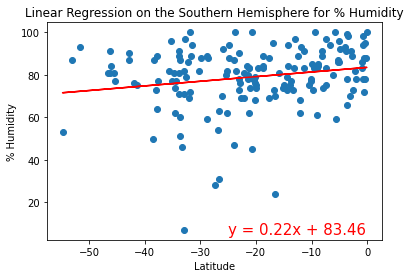

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-25,5))

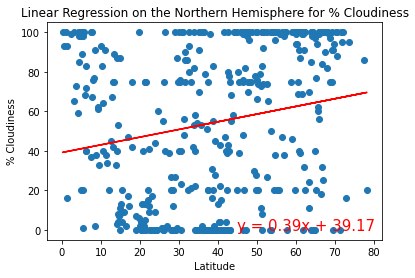

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,0))

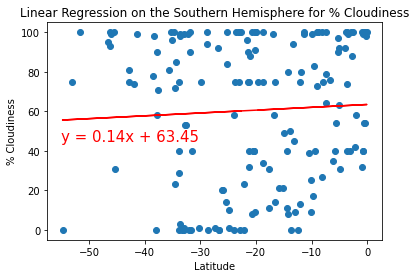

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,45))

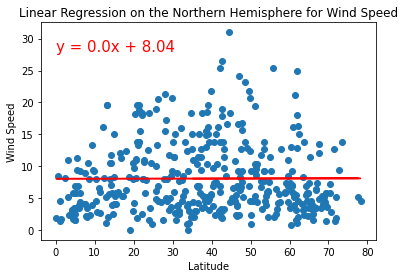

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,28))

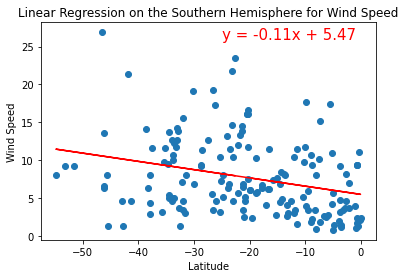

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-25,26))